In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import imageio

In [3]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(train_labels)

60000

In [5]:
BUFFER_SIZE = 60000
BATCH_SIZE = 128

In [6]:
dataset = tf.data.Dataset.from_tensor_slices(train_images)
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [7]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

In [8]:
dataset = tf.data.Dataset.from_tensor_slices(train_images)
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(, use_bias=False, input_shape=(100,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    
    tf.keras.layers.Reshape((7, 7, 256)),
    tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    
    tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='tanh'),
])

In [25]:
disc_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()
disc_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 7, 7, 128)      │       294,912 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 14, 14, 64)     │        73,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │           576 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,674,560 (6.39 MB)

 Trainable params: 1,649,088 (6.29 MB)

 Non-trainable params: 25,472 (99.50 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,769 (315.50 KB)

 Trainable params: 80,769 (315.50 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


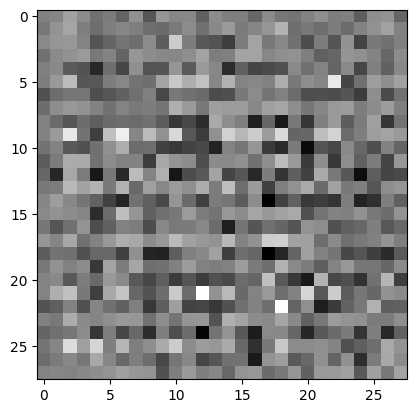

In [26]:
noise = tf.random.normal([1, 100])
test_image = model.predict(noise)
plt.imshow(test_image[0, :, :, 0], cmap='gray')

In [27]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [28]:
def disc_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)

    return real_loss + fake_loss

gan_loss = lambda output: cross_entropy(tf.ones_like(output),output)

gan_optimizer = tf.keras.optimizers.Adam(1e-4)
disc_optimizer = tf.keras.optimizers.Adam(1e-4)

In [30]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = 'ckpt'
checkpoint = tf.train.Checkpoint(
    disc_optimizer=disc_optimizer,
    gan_optimizer=gan_optimizer,
    gan=model,
    disc=disc_model,
)

In [31]:
EPOCHS = 50
noise_dim = 100
num_examples = 100
seed = tf.random.normal([num_examples, noise_dim])

In [37]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = model(noise, training=True)
        
        real_output = disc_model(images, training=True)
        fake_output = disc_model(generated_images, training=True)
        
        gen_loss = gan_loss(fake_output)
        disc_model_loss = disc_loss(real_output, fake_output)
    
    grad_gen = gen_tape.gradient(gen_loss, model.trainable_variables)
    grad_disc = disc_tape.gradient(disc_model_loss, disc_model.trainable_variables)
    
    gan_optimizer.apply_gradients(zip(grad_gen, model.trainable_variables))
    disc_optimizer.apply_gradients(zip(grad_disc, disc_model.trainable_variables))


In [33]:
import time
from tqdm import tqdm
from IPython import display

In [34]:
def generate_and_save_images(model, epoch, test_input, save=True):
    predictions = model(test_input, training=False)
    
    fig = plt.figure(figsize=(10,10))
    
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i, :, :, 0]*127.5 + 127.5, cmap='gray')
        plt.axis('off')
    
    if save:
        plt.savefig(f"img_epoch_{epoch:04d}.png")
    plt.show()

In [35]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        
        for image_batch in tqdm(dataset):
            train_step(image_batch)
        
        display.clear_output(wait=True)
        generate_and_save_images(model, epoch+1, seed, save=True)
    
    if (epoch + 1) % 10 == 0:
        checkpoint.save(file_prefix=checkpoint_prefix)
        
    print(f"Epoch {epoch + 1}: {time.time() - start} seconds")

    generate_and_save_images(model, EPOCHS, seed, save=True)

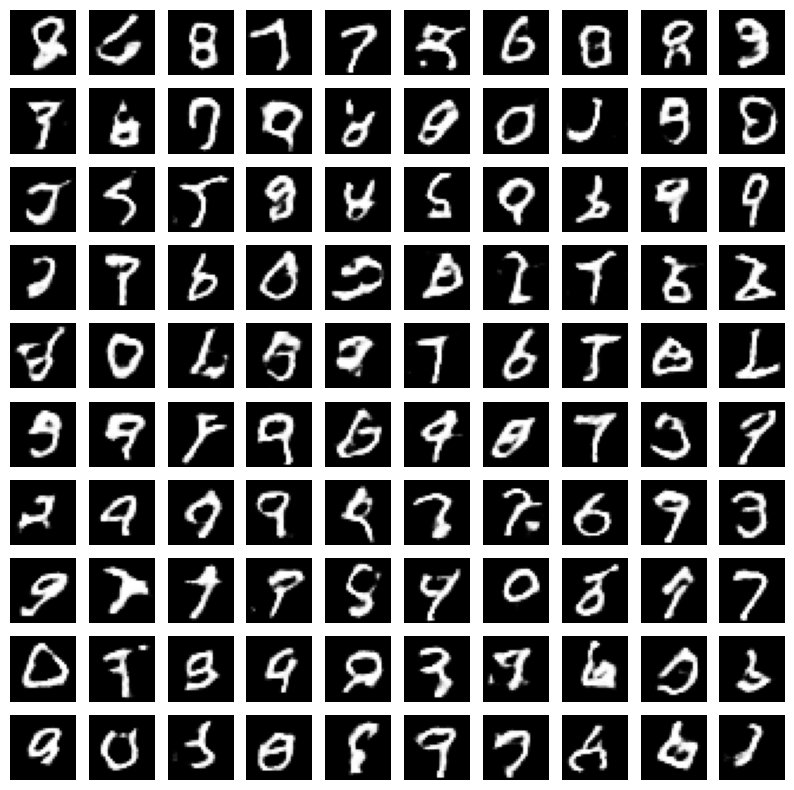

Epoch 50: 8.983969688415527 seconds


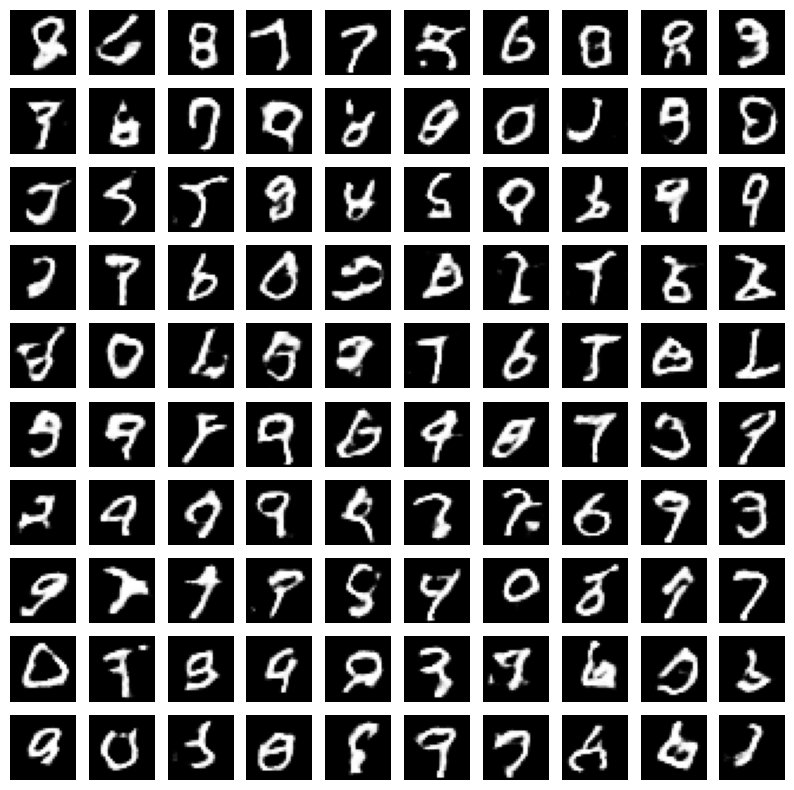

In [38]:
train(dataset, EPOCHS)

In [39]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


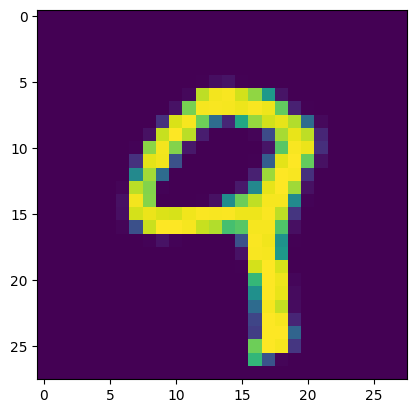

In [42]:
noise = tf.random.normal([1, 100])
test_image = model.predict(noise)
plt.imshow(test_image[0, :, :, 0])

In [43]:
model.save('mnist_gan.h5')

In [44]:
!zip -r file.zip /kaggle/working

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/img_epoch_0041.png (deflated 10%)
  adding: kaggle/working/img_epoch_0040.png (deflated 10%)
  adding: kaggle/working/img_epoch_0008.png (deflated 10%)
  adding: kaggle/working/img_epoch_0046.png (deflated 10%)
  adding: kaggle/working/img_epoch_0013.png (deflated 10%)
  adding: kaggle/working/img_epoch_0049.png (deflated 11%)
  adding: kaggle/working/img_epoch_0012.png (deflated 10%)
  adding: kaggle/working/img_epoch_0017.png (deflated 10%)
  adding: kaggle/working/img_epoch_0015.png (deflated 9%)
  adding: kaggle/working/img_epoch_0016.png (deflated 10%)
  adding: kaggle/working/img_epoch_0002.png (deflated 6%)
  adding: kaggle/working/img_epoch_0021.png (deflated 9%)
  adding: kaggle/working/img_epoch_0031.png (deflated 9%)
  adding: kaggle/working/mnist_gan.h5 (deflated 8%)
  adding: kaggle/working/img_epoch_0044.png (deflated 11%)
  adding: kaggle/working/img_epoch_0042.png (deflated 9%)
  adding: kaggle/working/img_e